In [7]:
!pip3 install pyproj==2.1.0

     |████████████████████████████████| 11.3MB 1.1MB/s eta 0:00:01
  Found existing installation: pyproj 2.2.0
    Uninstalling pyproj-2.2.0:
      Successfully uninstalled pyproj-2.2.0


In [1]:
from pysheds.grid import Grid
import matplotlib.pyplot as plt
from numba import jitclass, typed, typeof

In [5]:
grid= Grid.from_raster('data/dem/global_elevation.tif', data_name='dem')
# grid.fill_depressions(data='dem', out_name='flooded_dem')
# grid.resolve_flats(data='flooded_dem', out_name='inflated_dem')

In [7]:
grid.flowdir(data='dem', outname='dir')

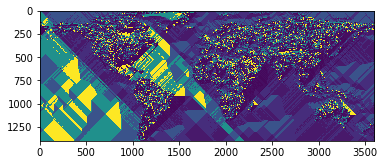

In [4]:
plt.imshow(grid.view('dir'))

In [263]:
grid.mask.shape

(1400, 3600)

In [265]:
dx = abs(grid.dem.affine.a)
dy = abs(grid.dem.affine.e)
ddiag = np.sqrt(dx**2 + dy**2)
cell_dists = (np.array([dy, ddiag, dx, ddiag, dy, ddiag, dx, ddiag])
            .reshape(-1, 1))

# grid.dem.flat[grid.mask] = grid.dem.max() + 1
inside = grid._inside_indices(grid.dem)
inner_neighbors, diff, fdir_defined = grid._d8_diff(grid.dem, inside)
slope = diff / cell_dists

In [31]:
grid.accumulation(data='dir', out_name='acc')

In [36]:
stream= grid.extract_river_network(fdir= 'catch', acc= 'acc',
                                     threshold=50, out_name='stream')

In [35]:
stream

{"features": [{"geometry": {"coordinates": [[-40.410651, 82.30013], [-40.310658, 82.30013], [-40.210666, 82.30013], [-40.210666, 82.200137], [-40.210666, 82.100145], [-40.210666, 79.400351], [-40.210666, 79.500343], [-40.210666, 79.600336], [-40.210666, 79.700328], [-40.210666, 79.80032], [-40.210666, 79.900313], [-40.210666, 80.000305], [-40.210666, 80.100298], [-40.210666, 80.20029], [-40.210666, 80.300282], [-40.210666, 80.400275], [-40.210666, 80.500267], [-40.210666, 80.600259], [-40.210666, 80.700252], [-40.210666, 80.800244], [-40.210666, 80.900237], [-40.210666, 81.000229], [-40.210666, 81.100221], [-40.210666, 81.200214], [-40.210666, 81.300206], [-40.210666, 81.400198], [-40.210666, 81.500191], [-40.210666, 81.600183], [-40.210666, 81.700175], [-40.210666, 81.800168], [-40.210666, 81.90016], [-40.210666, 82.000153], [-40.210666, 79.300359], [-40.210666, 79.200366]], "type": "LineString"}, "id": 0, "properties": {}, "type": "Feature"}, {"geometry": {"coordinates": [[-40.210666

In [40]:
import numpy as np
np.where(grid.acc>50)

(array([  17,   17,   17, ..., 1354, 1354, 1356]),
 array([1397, 1398, 1400, ..., 1100, 1101, 1108]))

In [2]:
import pyproj

In [10]:
grid.crs.is_latlong

AttributeError: 'Proj' object has no attribute 'is_latlong'

In [29]:
grid.extent

(-180.0, 180.07252671799034, -56.08931128350582, 84.0)

In [27]:
grid.cell_dh('dir','dem',out_name='slope')

In [296]:
grid.slope.min()

Raster(-1240.)

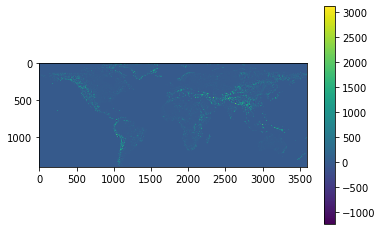

In [28]:
plt.imshow(grid.view('slope'))
plt.colorbar()

In [57]:
grid.cell_distance('dir',out_name='cell_dist')

-0.09999237065203842

In [45]:
grid.cor.shape

AttributeError: 'Grid' object has no attribute 'coord'

In [22]:
grid.catchment(data='dir', x= 22, y=66, out_name='catch')
# grid.flow_distance(data= 'catchment',  x= 23, y=60, out_name='dist')

In [23]:
grid.catch.min()

Raster(-1)

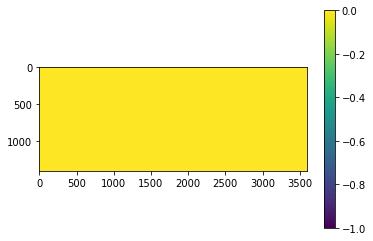

In [24]:
plt.imshow(grid.catch)
plt.colorbar()

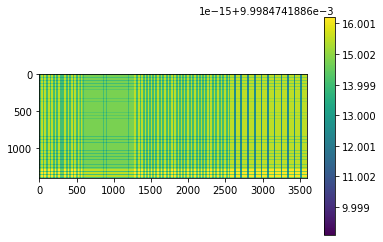

In [9]:
grid.cell_area(out_name='area')
plt.imshow(grid.area)
plt.colorbar()

In [28]:
grid.catch.mask

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

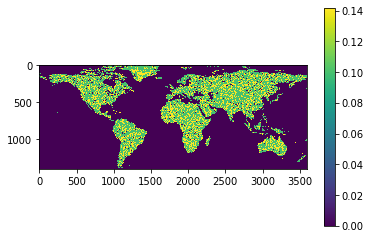

In [14]:
grid.cell_distances('dir', out_name= 'length')
plt.imshow(grid.length)
plt.colorbar()

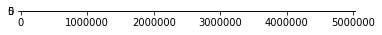

In [269]:
plt.imshow(np.array(slope))

In [12]:
grid.cell_slopes('dir', 'dem', out_name='slope')

/usr/local/lib/python3.7/site-packages/pyproj/proj.py:354: UserWarning: 'is_latlong()' is deprecated. Please use 'crs.is_geographic'.
  warnings.warn("'is_latlong()' is deprecated. Please use 'crs.is_geographic'.")
/usr/local/lib/python3.7/site-packages/pysheds/grid.py:1869: UserWarning: CRS is geographic. Area will not have meaningful units.
  warnings.warn(('CRS is geographic. Area will not have meaningful '


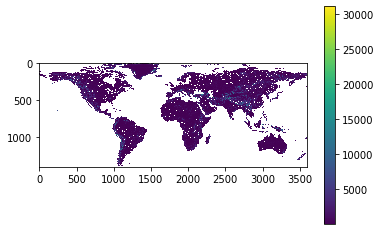

In [13]:
plt.imshow(grid.slope)
plt.colorbar()

In [ ]:
def slope(grid):
    

In [237]:
np.linspace(0,180,9)

array([  0. ,  22.5,  45. ,  67.5,  90. , 112.5, 135. , 157.5, 180. ])

In [2]:
import pandas as pd
import numpy as np
from numba import jitclass
from numba.typed import Dict
from numba import jitclass, typed, typeof
from numba import int32

In [60]:
def createNumbaType():
    forcing= typed.Dict()
    forcing['P']= 10.0
    forcing['PET']= 0.2
    fluxes= typed.Dict()
    fluxes['RS']= 0.0
    fluxes['RI']= 0.0
    states= typed.Dict()
    states['W0']= 0.0
    states['SI0']= 0.0
    states['SS0']= 0.0
    params= typed.Dict()
    params['RainFact']= 0.5
    params['Ksat']= 0.1
    params['WM']= 0.2
    
    
    return forcing, fluxes, states, params

forcing, fluxes, states, params= createNumbaType()

@jitclass([('forcing',typeof(forcing))])
class Forcing(object):
    def __init__(self, forcing):
        self.forcing= forcing
        
    def __str__(self):
        return str(['%s: %.4f'%(key, value) for key, value in self.forcing.items()])

@jitclass([('fluxes', typeof(fluxes))])
class Fluxes(object):
    def __init__(self, fluxes):
        self.fluxes= fluxes

    def __str__(self):
        return str(['%s: %.4f'%(key, value) for key, value in self.fluxes.items()])

    @property
    def df(self):
        self._df= pd.DataFrame(self.fluxes)
        return self._df


@jitclass([('states',typeof(states))])
class States(object):
    def __init__(self, states):
        self.states= states

    def __str__(self):
        return str(['%s: %.4f'%(key, value) for key, value in self.states.items()])

    @property
    def df(self):
        self._df= pd.DataFrame(self.states)
        return self._df
        
@jitclass([('params',typeof(params))])
class Parameters(object):
    def __init__(self, params):
        self.params= params

    def __str__(self):
        if self.params is None:
            raise ValueError('not initialize parameters')
        else:
            return str(['%s: %.4f'%(key, value) for key, value in self.params.items()])

specs= [
    ('i', int32),
    ('j', int32),
    ('forcing', typeof(forcing)),
    ('states', typeof(states)),
    ('params'), typeof(params),
    ('fluxes', typeof(fluxes))
]

@jitclass(specs)
class Cell(object):
    def __init__(self, i, j, forcing, states, params, fluxes):
        self.i= i
        self.j= j
        self.forcing= forcing
        self.states= states
        self.fluxes= fluxes
        self.params= params

    def __str__(self):
        return 'row: %d; col: %d\nForcing: %s\nParameters: %s\nFluxes: %s\nStates: %s'%(
            self.row, self.col, self.forcing, self.params, self.fluxes, self.states)

    def update(self, kwargs, type='states'):
        if type=='states':
            self.states.update(kwargs)
        elif type=='fluxes':
            self.fluxes.update(kwargs)




ValueError: too many values to unpack (expected 2)

In [231]:
import numpy as np
from numba import jit
import numba


@jit(nopython=True)
def _precipInt(P, RainFact):
    '''
    This function translates precipitation to effective precipitation

    Args:
    ---------------
    :P - Float; forcing precipitation data for one cell
    :RainFact - Parameter;

    Returns:
    ---------------
    :PInt - Float; translated precipitation
    '''
    return P*RainFact

@jit(nopython=True)
def _potEvap(E, EFact):
    '''
    This function converts evaporation to potential evaporation
    '''

    return E*EFact

@jit(nopython=True)
def _evapAct(W0, P, EPot, W):
    '''
    This function converts evaporation to actual evaporation

    Args:
    ----------------
    :W0 - Float; initial capacity
    :P - Float; precipitation
    :EPot - Float; Potential evaporation
    :W - Float
    '''
    if P>EPot: EAct= EPot;
    else: EAct= W0-W;

    return EAct

@jit(nopython=True)
def _runoff(
        W0, P, EPot, WM, IM,
        B, Ksat
    ):
    '''
    The runoff generation function for CREST

    Args:
    --------------
    :W0 - mm; initial capacity
    :P - mm/step; precipitation
    :EPot - mm/step; calibrated potential evaporation
    :WM - Parameter; mm maximum water depth in bucket WM
    :IM - Parameter;
    :B - Parameter;
    :Ksat - Parameter;

    Returns:
    --------------
    :W - mm; state
    :ExcS - mm; depth of infiltrated excess rain
    :ExcI - mm; depth of surface excess rain
    '''

    if P>EPot:
        #available precipitation in soil
        PSoil= (P-EPot)*(1.0-IM)
        if W0<WM:
            WMM= WM*(1.0+B)
            A= WMM*(1.0-(1.0-W0/WM)**(1.0/(1.0+B)))
            if PSoil+A>=WMM:
                R= PSoil- (WM-W0)
                W= WM
            else:
                R= PSoil-(WM-W0)+WM*(1.0-(A+PSoil)/WMM)**(1.0+B)

                if R<0: R=0.0;
                W= W0+PSoil-R

        else: #soil is full
            R= PSoil
            W= W0

        # amount of water goes to infiltration
        temX= ((W0+W)/2.0)*Ksat/WM
        if (R<=temX): ExcI= R;
        else: ExcI= temX;

        ExcS= R-ExcI+(P-EPot)*IM

        if ExcS<0: ExcS=0.0;

    else:
        ExcS= 0.0
        ExcI=0.0
        temX= (EPot-P)*W0/WM
        if temX<W0: W= W0-temX;
        else: W=0.0;
    
#     print(P+W0-EPot-W-ExcS-ExcI) water balanced

    return [W, ExcS, ExcI]

def _core(cell, timestep=1, routingType='CLR'):
    '''
    this function controls all processes

    Args:
    -----------------
    :cell - Cell object that contains Parameters, Forcing, States, Fluxes
    :timestep - int;
    :routingType
    
    Returns:
    -----------------
    :cell - Cell object; updated by states and fluxes
    '''

    #---------Forcing data---------#
    Rain= cell.forcing['P']*timestep
    PET= cell.forcing['PET']*timestep

    #---------States---------------#
    W0= cell.states['W0']
    SI0= cell.states['SI0']
    SS0= cell.states['SS0']

    #---------Fluxes---------------#
    RS= cell.fluxes['RS']
    RI= cell.fluxes['RI']

    #---------Parameter------------#
    RainFact= cell.params['RainFact']
    KE= cell.params['KE']
    B= cell.params['B']
    KS= cell.params['KS']
    KI= cell.params['KI']
    WM= cell.params['WM']
    IM= cell.params['IM']
    Ksat= cell.params['Ksat']
    
    #----------Modelling------------#
    Rain= _precipInt(Rain, RainFact)
    EPot= _potEvap(PET, KE)

    W, ExcS, ExcI= _runoff(W0, Rain, EPot, WM, IM, B,
     Ksat*timestep)

    EAct= _evapAct(W0, Rain, EPot, W)

    SS0+= ExcS
    RS= SS0*KS
    SS0= SS0*(1.0-KS)

    SI0+= ExcI
    RI= SI0*KI
    SI0= SI0*(1.0-KI)

    W0= W

    states= {
    'W0': W0,
    'SI0': SI0,
    'SS0': SS0
    }
    fluxes= {
    'RS': RS,
    'RI': RI
    }

    cell.update(states, 'states')
    cell.update(fluxes, 'fluxes')
#     print(Rain-EAct-RI-RS-SS0-SI0-W0) water balanced
#     assert Rain-EAct-RI-RS+SS0+SI0+W0>1e-5, Rain-EAct-RI-RS+SS0+SI0+W0

    return None


In [232]:
cell= Cell(2,2)

In [235]:
print(cell)

row: 2; col: 2
Forcing: {'P': 10.0, 'PET': 0.2}
Parameters: {'RainFact': 0.5, 'Ksat': 0.1, 'WM': 0.6, 'B': 0.4, 'IM': 0.6, 'KE': 0.1, 'coeM': 0.1, 'expM': 0.1, 'coeR': 0.1, 'coeS': 0.1, 'KS': 0.9, 'KI': 0.8}
Fluxes: {'RS': 3.8970000000000002, 'RI': 0.04000000000000001}
States: {'W0': 0.6, 'SI0': 0.009999999999999998, 'SS0': 0.4329999999999999}


In [234]:
_core(cell)

In [163]:
print(cell)

row: 2; col: 2
Forcing: {'P': 10.0, 'PET': 0.2}
Parameters: {'RainFact': 0.5, 'Ksat': 0.1, 'WM': 0.6, 'B': 0.4, 'IM': 0.6, 'KE': 0.1, 'coeM': 0.1, 'expM': 0.1, 'coeR': 0.1, 'coeS': 0.1, 'KS': 0.9, 'KI': 0.8}
Fluxes: {'RS': 4.879999901700001, 'RI': 0.3245025280000001}
States: {'W0': 0.6, 'SI0': 0.3245025280000001, 'SS0': 0.5422222112999999}


In [140]:
10-0.2-4.87999999-0.324502+0.6+0.324+0.542

6.06149801

In [131]:
s= States(np.zeros((1,1)))

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:32: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


In [40]:
type(s)

__main__.States

In [39]:
print(s)

['W: 0.0000', 'SM: 0.0000', 'ExcS: 0.0000', 'ExcI: 0.0000']


In [23]:
basic_params = Parameters()

In [24]:
print(basic_params)

['RainFact: 0.0000', 'Ksat: 0.0000', 'WM: 0.0000', 'B: 0.0000', 'IM: 0.0000', 'KE: 0.0000', 'coeM: 0.0000', 'expM: 0.0000', 'coeR: 0.0000', 'coeS: 0.0000', 'KS: 0.0000', 'KI: 0.0000']


In [7]:
grids= np.zeros(
            (100, 100), dtype= {
            'names': ('InflowI', 'InflowS', 'StateW',
                     'StateI', 'StateS', 'RainFact', 'Ksat',
                     'WM', 'B', 'IM', 'coeM', 'expM', 'coeR',
                     'coeS', 'KS', 'KI'),
            'formats': ('f4', 'f4', 'f4', 'f4', 'f4',
                         'f4', 'f4', 'f4', 'f4', 'f4',
                         'f4','f4','f4','f4','f4','f4')
            }
            )

grids['InflowI']= 2

In [12]:
grids[20,10][0]

2.0

In [13]:
grids[20,20][2]= 5.0

In [14]:
grids[20,20]

(2., 0., 5., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.)